Code to re-create figures in the Results section of the manuscript written by Pieters and Van den Berghe et al (in review, 2024).

In [16]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import numpy as np
import ptitprince as pt #The Python implementation of Raincloud is a package named PtitPrince, written on the top of seaborn, a Python plotting library written to obtain good-looking plots from pandas dataframes.
import seaborn as sns
sns.set(style="whitegrid",font_scale=2)

The following part will guide you in the creation of Raincloud plots.

In [2]:
savefigs = True
figs_dir = '/figs'

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir('figs'):
        os.makedirs('figs')

In [3]:
def export_fig(axis,text, fname):
    if savefigs:
        axis.text()
        axis.savefig(fname, bbox_inches='tight')

Load datasets and visualize the distribution of each measure as a Raincloud plot:

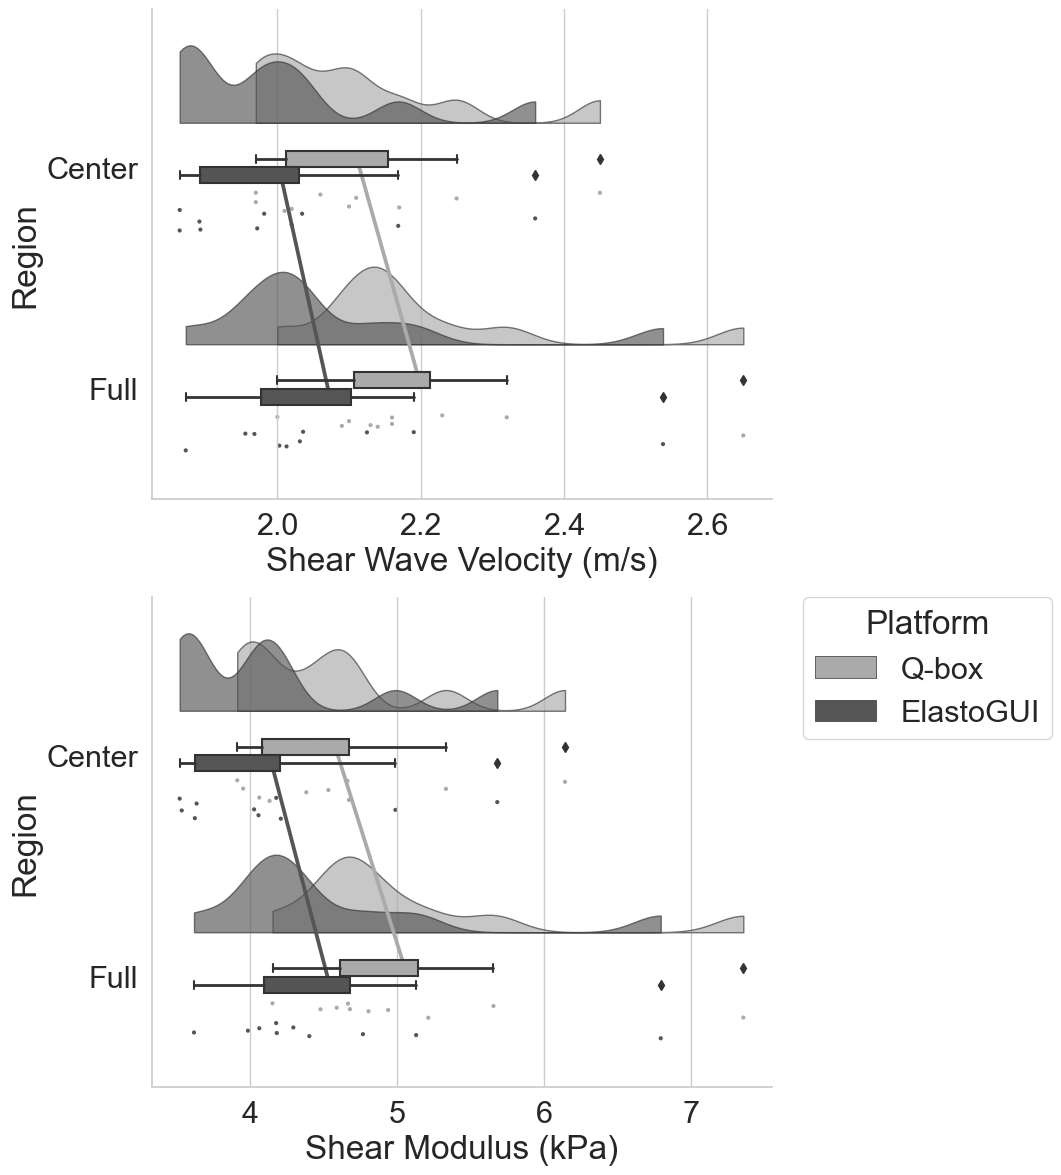

In [113]:
# Figure 2
fig, axs = plt.subplots(figsize=(8,14),nrows=2)
matplotlib.rcParams.update({'font.size': 32})

df = pd.read_csv ("ShearWaveVelocity.csv", sep= ",")
dx1="Region"; dy1="Shear Wave Velocity (m/s)"; dhue = "Platform"; ort="h"; pal = "binary"; sigma = .2

ax=pt.RainCloud(x = dx1, y = dy1, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                ax=axs[0], orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()

# Remove part of the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

df = pd.read_csv ("ShearModulus.csv", sep= ",")
dx2="Region"; dy2="Shear Modulus (kPa)"; 

ax = pt.RainCloud(x = dx2, y = dy2, hue = dhue, data = df, palette = pal, bw = sigma, width_viol = .7,
                  ax = axs[1], orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)
# ax.legend_.remove()

# Remove part of the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# axes[0].set_xlabel("Region", fontsize=24)
# axes[0].set_ylabel("Shear Modulus (kPa)", fontsize=24)
# axes[0].tick_params(axis='both', labelsize=24)

matplotlib.rcParams.update({'font.size': 32})

if savefigs:
    #plt.savefig('figs/SWEfigure2_v2.pdf', bbox_inches='tight')
    plt.savefig('figs/SWEfigure2_v2.png', bbox_inches = 'tight',  dpi=300)

Load a dataset to create and plot a simple linear regression between the data of AVI and DICOM file extensions:

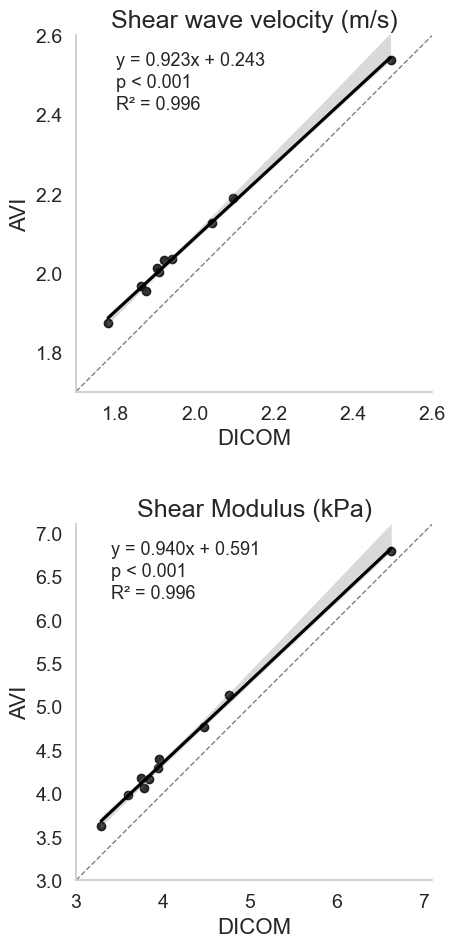

In [43]:
# Figure 3
# Load datasets
SWE_velocity = pd.read_csv("FormatsRegression_ShearVelocity.csv")
SWE_modulus = pd.read_csv("FormatsRegression_ShearModulus.csv")

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))  # Adjust figsize as needed
matplotlib.rcParams.update({'font.size': 15})

# --- First Subplot (Shear Wave Velocity) ---
ax = axes[0]
sns.regplot(x="DICOM", y="AVI", data=SWE_velocity, ax=ax, color = 'black')
ax.set(title='Shear wave velocity (m/s)')

# Set equal ranges to the x and y axes
ax.set_xlim(1.7, 2.6) 
ax.set_ylim(1.7, 2.6)
ax.set_aspect('equal')

# Draw a diagonal dashed line
ax.axline((0, 0), (1, 1), linewidth=1, color='grey',linestyle='--')

# Remove part of the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(SWE_velocity["DICOM"], SWE_velocity["AVI"], 1)

# Annotate the plot with the regression equation
ax.annotate(f"y = {slope:.3f}x + {intercept:.3f}", xy=(1.8, 2.525), fontsize=13, ha="left")

# Annotate the plot with the adjusted variance and p-value
ax.annotate("p < 0.001", xy=(1.8, 2.47), fontsize=13, ha="left")
ax.annotate("R² = 0.996", xy=(1.8, 2.415), fontsize=13, ha="left")

# Remove grid in subplot 1
ax. grid(False)


# --- Second Subplot (Shear Modulus) ---
ax = axes[1]
sns.regplot(x="DICOM", y="AVI", data=SWE_modulus, ax=ax, color = 'black')
ax.set(title='Shear Modulus (kPa)')

# Set equal ranges to the x and y axes
ax.set_xlim(3, 7.1) 
ax.set_ylim(3, 7.1)
ax.set_aspect('equal')

# Draw a diagonal dashed line
ax.axline((3, 3), (7.1, 7.1), linewidth=1, color='grey',linestyle='--')

# Remove part of the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(SWE_modulus["DICOM"], SWE_modulus["AVI"], 1)

# Annotate the plot with the regression equation
ax.annotate(f"y = {slope:.3f}x + {intercept:.3f}", xy=(3.4, 6.75), fontsize=13, ha="left")

# Annotate the plot with the adjusted variance and p-value
ax.annotate("p < 0.001", xy=(3.4, 6.5), fontsize=13, ha="left")
ax.annotate("R² = 0.996", xy=(3.4, 6.25), fontsize=13, ha="left")

# Adjust spacing and layout
plt.tight_layout()

# Adjust font size
axes[0].set_xlabel("DICOM", fontsize=16)
axes[0].set_ylabel("AVI", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].set_xlabel("DICOM", fontsize=16)
axes[1].set_ylabel("AVI", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

axes[0].title.set_size(18)
axes[1].title.set_size(18)

# Remove grid in subplot 2
ax. grid(False)

# Save the figure
if savefigs:
    plt.savefig('figs/SWEfigure3_subplot.pdf', bbox_inches='tight')  # Update filename
    plt.savefig('figs/SWEfigure3_subplot.png', dpi=1200)  # Update filename
    
# Show the plot
plt.show()

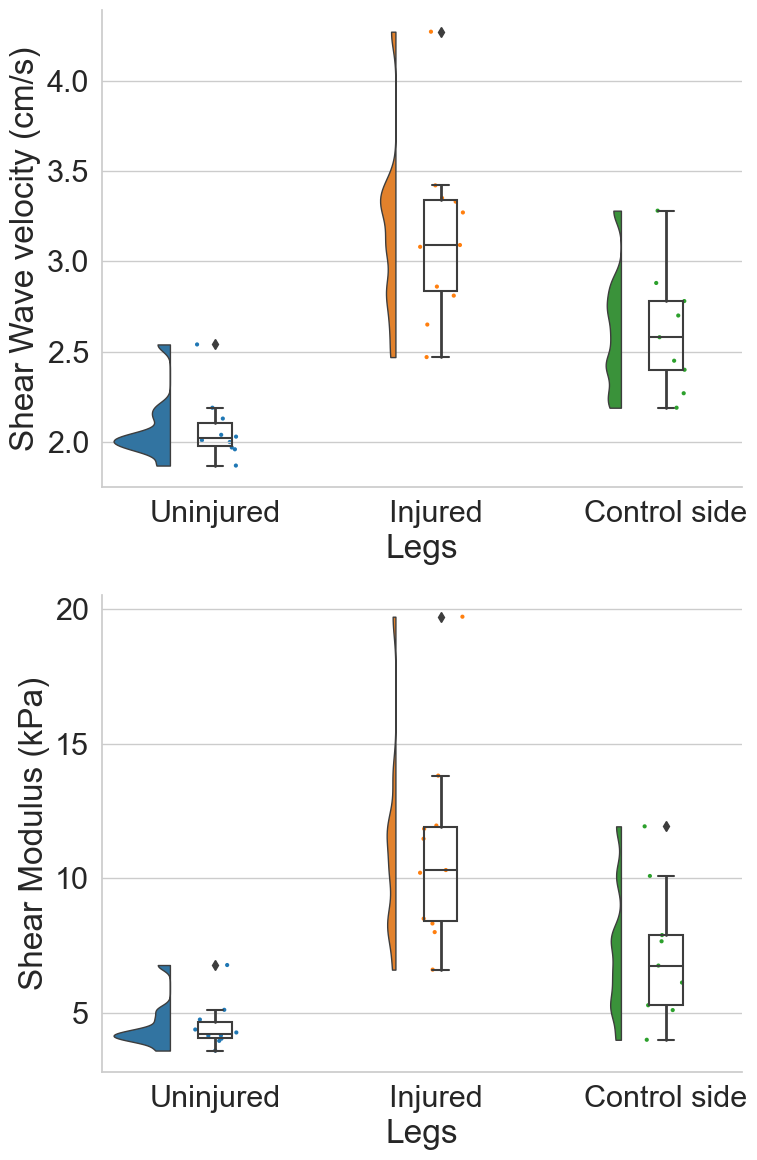

In [109]:
# Figure 4
# Load the dataset
df = pd.read_csv("groupComparison.csv", sep=",")

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12)) 
matplotlib.rcParams.update({'font.size': 20})

# --- First Subplot (Shear Wave Velocity) ---
dx = "Legs"
dy = "Shear Wave velocity (cm/s)"
ort = "v"
pal = "colorblind"
sigma = 0.2

ax = axes[0]
ax = pt.RainCloud(x=dx, y=dy, data=df, palette="tab10", bw=sigma,
                 width_viol=0.5, ax=ax, orient=ort)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Second Subplot (Shear Modulus) ---
dy = "Shear Modulus (kPa)"  # Only change needed for the second plot

ax = axes[1]
ax = pt.RainCloud(x=dx, y=dy, data=df, palette="tab10", bw=sigma,
                 width_viol=0.5, ax=ax, orient=ort)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust spacing and layout
plt.tight_layout()


# Save the figure (optional)
if savefigs:
    plt.savefig('figs/SWEfigure_subplot.pdf', bbox_inches='tight')  # Update filename
    plt.savefig('figs/SWEfigure_subplot.png', dpi=1200)  # Update filename

# Show the plot
plt.show()